# Ad-Hoc Analysis for consumer goods

There are 10 Ad-hoc requests that are required. The requests are fullfiled by SQL queries in MySQL workbench. This notebook contains the visualisation of each ad-hoc query.

The output of each SQL query is taken as a csv file and are named from df1 to df10 and relavant visualization for each dataframe is done

## Importing necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Data loading and printing

In [3]:
dataframes = []

for i in range(1, 11):
  filename = f'/content/drive/MyDrive/Adhoc csv files/Solution {i}.csv'
  df = pd.read_csv(filename)
  dataframes.append(df)

# Assign the dataframes to their respective variables
df1 = dataframes[0]
df2 = dataframes[1]
df3 = dataframes[2]
df4 = dataframes[3]
df5 = dataframes[4]
df6 = dataframes[5]
df7 = dataframes[6]
df8 = dataframes[7]
df9 = dataframes[8]
df10 = dataframes[9]


In [4]:
#Display results of all 10 daaframes

for i in range(1, 11):
  print(f"DataFrame {i}")
  display(dataframes[i-1])
  print("\n")


DataFrame 1


,market
0,India
1,Indonesia
2,Japan
3,Philiphines
4,South Korea
5,Australia
6,Newzealand
7,Bangladesh




DataFrame 2


,unique_products_2020,unique_products_2021,percentage_chg
0,245,334,36.33




DataFrame 3


,segment,product_count
0,Notebook,116
1,Accessories,104
2,Peripherals,79
3,Desktop,22
4,Storage,17
5,Networking,9




DataFrame 4


,segment,product_count_2020,product_count_2021,difference
0,Accessories,69,103,34
1,Notebook,92,108,16
2,Peripherals,59,75,16
3,Desktop,7,22,15
4,Storage,12,17,5
5,Networking,6,9,3




DataFrame 5


,product_code,product,manufacturing_cost
0,A2118150101,AQ Master wired x1 Ms,0.8920
1,A6120110206,AQ HOME Allin1 Gen 2,240.5364




DataFrame 6


,customer_code,customer,avg_preinvoice_dis_pct
0,90002009,Flipkart,30.83
1,90002006,Viveks,30.38
2,90002003,Ezone,30.28
3,90002002,Croma,30.25
4,90002016,Amazon,29.33




DataFrame 7


,month,year,total_gross_price_mln
0,9,2019,16.85
1,10,2019,18.35
2,11,2019,27.99
3,12,2019,17.78
4,1,2020,17.14
5,2,2020,14.13
6,3,2020,12.52
7,4,2020,7.71
8,5,2020,12.93
9,6,2020,11.52




DataFrame 8


,fiscal_quarter,total_sold_quantity_mln
0,Q1,7.01
1,Q2,6.65
2,Q4,5.04
3,Q3,2.08




DataFrame 9


,channel,gross_sales_mln,percentage
0,Direct,353.96,16.08
1,Distributor,248.47,11.29
2,Retailer,1598.16,72.62




DataFrame 10


,division,product_code,product,variant,total_sold_quantity,rnk
0,N & S,A6720160103,AQ Pen Drive 2 IN 1,Premium,701373,1
1,N & S,A6818160202,AQ Pen Drive DRC,Plus,688003,2
2,N & S,A6819160203,AQ Pen Drive DRC,Premium,676245,3
3,P & A,A2319150302,AQ Gamers Ms,Standard 2,428498,1
4,P & A,A2520150501,AQ Maxima Ms,Standard 1,419865,2
5,P & A,A2520150504,AQ Maxima Ms,Plus 2,419471,3
6,PC,A4218110202,AQ Digit,Standard Blue,17434,1
7,PC,A4319110306,AQ Velocity,Plus Red,17280,2
8,PC,A4218110208,AQ Digit,Premium Misty Green,17275,3


## Query 1

Provide the list of markets in which customer "Atliq Exclusive" operates its business in the APAC region.

In [5]:
# Replace incorrect spelling of 'Phillipines' with 'Philippines' in df1
df1['market'] = df1['market'].replace('Philiphines', 'Philippines')

In [6]:
df1

,market
0,India
1,Indonesia
2,Japan
3,Philippines
4,South Korea
5,Australia
6,Newzealand
7,Bangladesh


In [7]:
fig = px.choropleth(df1, locations='market',
                    locationmode='country names',
                    color='market'
                    )

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='orthographic',
        showocean=True,
        oceancolor='lightblue',
        countrycolor='black',
        coastlinecolor='black',
    ),
)
fig.update_geos(
    showcountries=True,
    countrycolor='black')

fig.show()


## Query 2

What is the percentage of unique product increase in 2021 vs. 2020? The final output contains these fields:
unique_products_2020,
unique_products_2021,
percentage_chg

In [8]:
df2

,unique_products_2020,unique_products_2021,percentage_chg
0,245,334,36.33


<Figure size 900x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

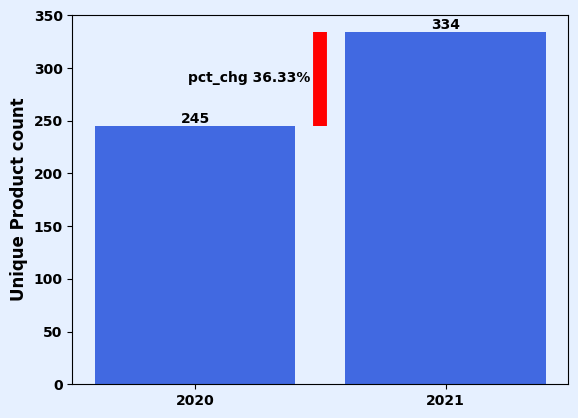

In [9]:
unique_products_2020 = df2['unique_products_2020'].values[0]
unique_products_2021 = df2['unique_products_2021'].values[0]
percentage_chg = df2['percentage_chg'].values[0]
plt.figure(figsize=(9, 6))
plt.figure(facecolor='#001F3D')
fig, ax = plt.subplots()

# Creating the bar chart
bars = ax.bar(['2020', '2021'], [unique_products_2020, unique_products_2021], color=['#4169E1'])
ax.set_facecolor('#E6F0FF')
fig.patch.set_facecolor('#E6F0FF')

# Adding the error bar (percentage change)
mid_x = (bars[0].get_x() + bars[0].get_width()/2 + bars[1].get_x() + bars[1].get_width()/2) / 2
ax.errorbar(mid_x, (unique_products_2020 + unique_products_2021) / 2, yerr= (unique_products_2021 - unique_products_2020)/2, color='red', elinewidth = 10)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontweight='bold', color='black')


# Adding the percentage change annotation
ax.annotate(f'pct_chg {percentage_chg}%',
            xy=(mid_x , unique_products_2021 / 2),
            xytext=(mid_x-0.04, unique_products_2021 / 2 + 130),
            ha='right', va = 'top',
            fontweight='bold'
            )

# Adding labels and title
ax.set_ylabel('Unique Product count', fontweight='bold', fontsize=12)
ax.set_title('')
ax.tick_params(axis='x', colors='black', labelsize=10)
ax.tick_params(axis='y', colors='black', labelsize=10)

for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.show()

## Query 3

Provide a report with all the unique product counts for each segment and sort them in descending order of product counts. The final output contains 2 fields segment,
product_count

In [10]:
df3

,segment,product_count
0,Notebook,116
1,Accessories,104
2,Peripherals,79
3,Desktop,22
4,Storage,17
5,Networking,9


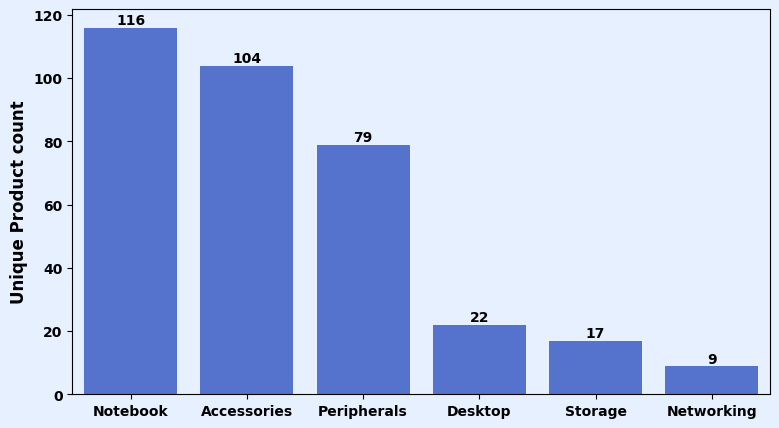

In [11]:
plt.figure(figsize=(9, 5), facecolor='#001F3D')
ax = sns.barplot(x='segment', y='product_count', data=df3, color='#4169E1')

# Set background colors
ax.set_facecolor('#E6F0FF')
fig = plt.gcf()
fig.patch.set_facecolor('#E6F0FF')

# Add labels on top of the bars
ax.bar_label(ax.containers[0], fontsize=10, fontweight='bold', color='black')

# Set y-axis label
ax.set_xlabel('')
ax.set_ylabel('Unique Product count', fontweight='bold', fontsize=12)

# Set x and y axis tick parameters
ax.tick_params(axis='x', colors='black', labelsize=10)
ax.tick_params(axis='y', colors='black', labelsize=10)

# Set tick labels to be bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.show()


## Query 4

Follow-up: Which segment had the most increase in unique products in 2021 vs 2020? The final output contains these fields: segment, product_count_2020, product_count_2021, difference

In [12]:
df4

,segment,product_count_2020,product_count_2021,difference
0,Accessories,69,103,34
1,Notebook,92,108,16
2,Peripherals,59,75,16
3,Desktop,7,22,15
4,Storage,12,17,5
5,Networking,6,9,3


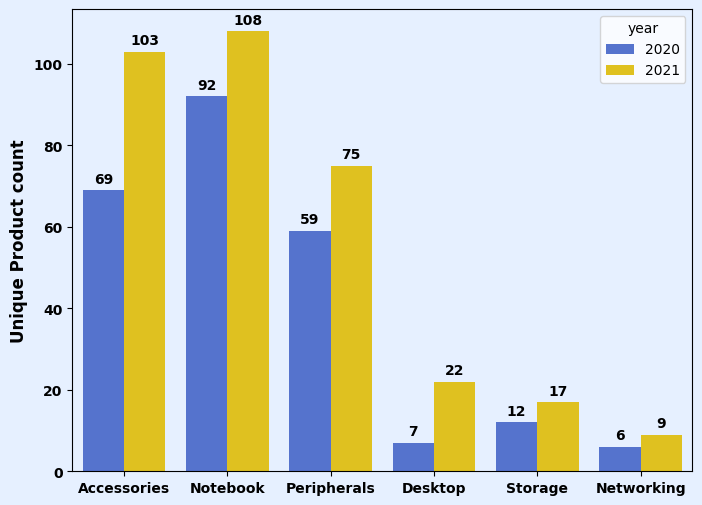

In [13]:
# Melt the DataFrame to long format
df_melted = df4.melt(id_vars='segment', value_vars=['product_count_2020', 'product_count_2021'],
                     var_name='year', value_name='product_count')

# Add a column for the year as a more readable label
df_melted['year'] = df_melted['year'].str.replace('product_count_', '').str.replace('_', ' ')

# Create the figure with a larger size
plt.figure(figsize=(8, 6), facecolor='#001F3D')  # Set figure size and background color
ax = sns.barplot(x='segment', y='product_count', hue='year', data=df_melted, palette=['#4169E1', '#FFD700'])  # Set bar colors

# Set background colors
ax.set_facecolor('#E6F0FF')  # Axes background color
fig = plt.gcf()  # Get the current figure
fig.patch.set_facecolor('#E6F0FF')  # Figure background color

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fontweight='bold', color='black', label_type='edge', padding=3)

# Set y-axis label
ax.set_ylabel('Unique Product count', fontweight='bold', fontsize=12)

# Remove the x-axis title
ax.set_xlabel('')  # Set the x-axis title to an empty string to remove it

# Set x and y axis tick parameters
ax.tick_params(axis='x', colors='black', labelsize=10)
ax.tick_params(axis='y', colors='black', labelsize=10)

# Set tick labels to be bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.show()


## Query 5

Get the products that have the highest and lowest manufacturing costs. The final output should contain these fields, product_code product manufacturing_cost

In [14]:
df5

,product_code,product,manufacturing_cost
0,A2118150101,AQ Master wired x1 Ms,0.8920
1,A6120110206,AQ HOME Allin1 Gen 2,240.5364


In [15]:
fig = go.Figure()

# Add Highest Cost card
fig.add_trace(go.Indicator(
    mode="number",
    value=df5['manufacturing_cost'][0],
    title={'text': f"{df5['product'][0]} ({df5['product_code'][0]})"},
    number={'prefix': '$', 'font': {
        'size': 100,
        'color': 'green',
      }},
    domain={'row': 0, 'column': 0}
))

# Add Lowest Cost card
fig.add_trace(go.Indicator(
    mode="number",
    value=df5['manufacturing_cost'][1],
    title={'text': f"{df5['product'][1]} ({df5['product_code'][1]})"},
    number={'prefix': '$', 'font': {'size': 100, 'color': 'red'}},
    domain={'row': 0, 'column': 1},
))

# Update layout
fig.update_layout(
    grid={'rows': 1, 'columns': 2},
    paper_bgcolor='#E6F0FF',  # Set figure background color
    plot_bgcolor='#E6F0FF'
)

# Show the plot
fig.show()

## Query 6

Generate a report which contains the top 5 customers who received an average high pre_invoice_discount_pct for the fiscal year 2021 and in the Indian market. The final output contains these fields: customer_code, customer, average_discount_percentage

In [16]:
df6

,customer_code,customer,avg_preinvoice_dis_pct
0,90002009,Flipkart,30.83
1,90002006,Viveks,30.38
2,90002003,Ezone,30.28
3,90002002,Croma,30.25
4,90002016,Amazon,29.33


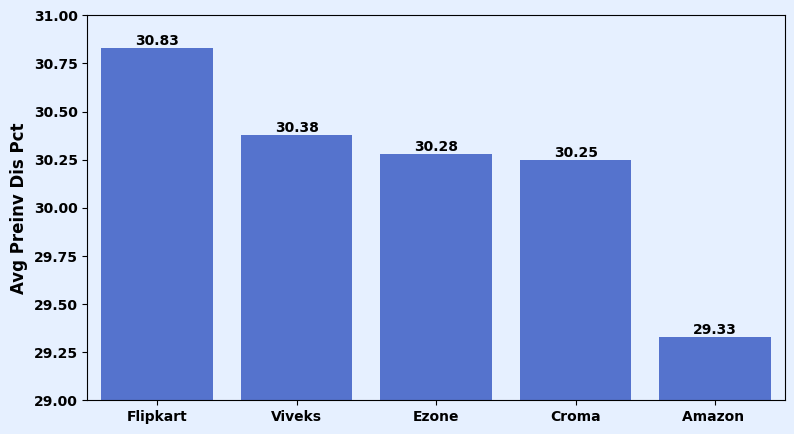

In [17]:
plt.figure(figsize=(9, 5))

# Create the bar plot
ax = sns.barplot(x='customer', y='avg_preinvoice_dis_pct', data=df6, color='#4169E1')

# Add value labels on top of the bars
ax.bar_label(ax.containers[0], fontsize=10, fontweight='bold', color='black')

# Set background colors
ax.set_facecolor('#E6F0FF')
plt.gcf().patch.set_facecolor('#E6F0FF')

# Customize the x-axis and y-axis ticks and labels
ax.tick_params(axis='x', colors='black', labelsize=10,)
ax.tick_params(axis='y', colors='black', labelsize=10)

# Set the y-axis label
ax.set_xlabel('')
ax.set_ylabel('Avg Preinv Dis Pct', fontsize=12, fontweight='bold')

# Set tick labels to be bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Set y-axis limits for better comparison
ax.set_ylim(29, 31)

# Show the plot
plt.show()


## Query 7

Get the complete report of the Gross sales amount for the customer “Atliq Exclusive” for each month . This analysis helps to get an idea of low and high-performing months and take strategic decisions.

The final report contains these columns: Month, Year, Gross sales Amount

In [18]:
df7

,month,year,total_gross_price_mln
0,9,2019,16.85
1,10,2019,18.35
2,11,2019,27.99
3,12,2019,17.78
4,1,2020,17.14
5,2,2020,14.13
6,3,2020,12.52
7,4,2020,7.71
8,5,2020,12.93
9,6,2020,11.52


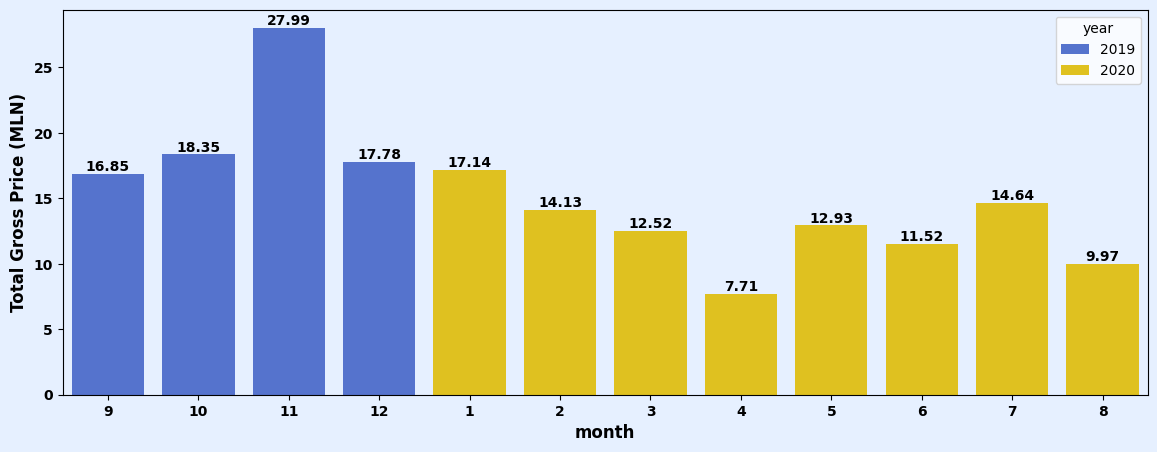

In [19]:
plt.figure(figsize=(14, 5))
plt.grid(False)
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]

# Convert 'month' to a categorical type with the defined order
df7['month'] = pd.Categorical(df7['month'], categories=month_order, ordered=True)

# Create the bar plot
ax = sns.barplot(x='month', y='total_gross_price_mln', hue='year', data=df7, palette=['#4169E1', '#FFD700'])

# Add value labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, color='black', fontweight='bold')

# Set background colors
ax.set_facecolor('#E6F0FF')
plt.gcf().patch.set_facecolor('#E6F0FF')

# Customize the x-axis and y-axis ticks and labels
ax.tick_params(axis='x', colors='black', labelsize=10)
ax.tick_params(axis='y', colors='black', labelsize=10)

# Set the y-axis label
ax.set_xlabel('month', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Gross Price (MLN)', fontsize=12, fontweight='bold')

for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Show the plot
plt.show()


## Query 8

In which quarter of 2020, got the maximum total_sold_quantity? The final output contains these fields sorted by the total_sold_quantity, Quarter, total_sold_quantity

In [20]:
df8

,fiscal_quarter,total_sold_quantity_mln
0,Q1,7.01
1,Q2,6.65
2,Q4,5.04
3,Q3,2.08


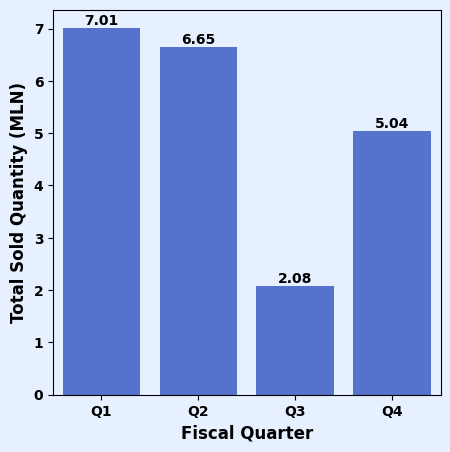

In [21]:
fiscal_quarter = ['Q1', 'Q2', 'Q3', 'Q4']

# Convert 'fiscal_quarter' to a categorical type with the defined order
df8['fiscal_quarter'] = pd.Categorical(df8['fiscal_quarter'], categories=fiscal_quarter, ordered=True)

plt.figure(figsize=(5, 5))
ax = sns.barplot(data=df8, x='fiscal_quarter', y='total_sold_quantity_mln', color='#4169E1')

# Add value labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, color='black', fontweight='bold')

# Set background colors
ax.set_facecolor('#E6F0FF')  # Axes background color
plt.gcf().patch.set_facecolor('#E6F0FF')  # Figure background color


# Customize the x-axis and y-axis ticks and labels
ax.tick_params(axis='x', colors='black', labelsize=10)  # X-axis ticks
ax.tick_params(axis='y', colors='black', labelsize=10)  # Y-axis ticks

# Set the y-axis label
ax.set_ylabel('Total Sold Quantity (MLN)', fontsize=12, fontweight='bold')

# Set the x-axis label
ax.set_xlabel('Fiscal Quarter', fontsize=12, fontweight='bold')

for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')


# Show the plot
plt.show()


## Query 9

Which channel helped to bring more gross sales in the fiscal year 2021 and the percentage of contribution? The final output contains these fields, channel, gross_sales_mln percentage

In [22]:
df9

,channel,gross_sales_mln,percentage
0,Direct,353.96,16.08
1,Distributor,248.47,11.29
2,Retailer,1598.16,72.62


[]

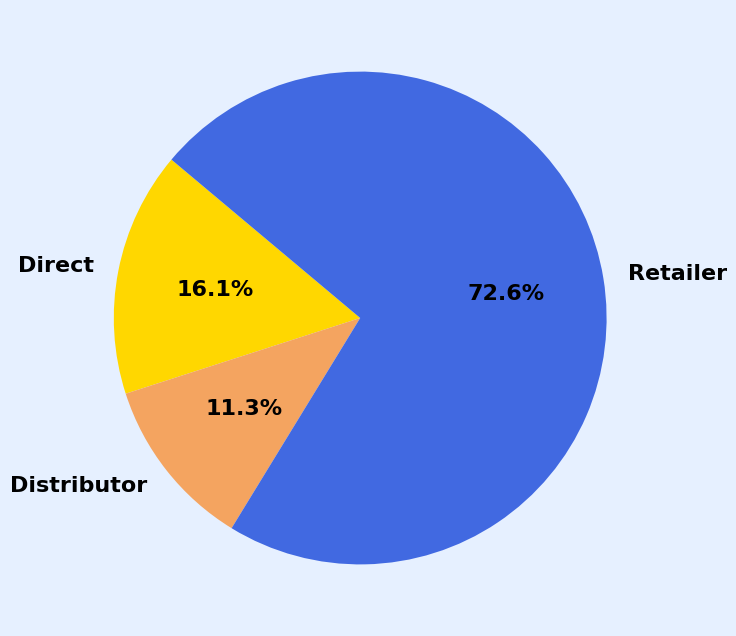

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(df9['percentage'], labels=df9['channel'], autopct='%1.1f%%', startangle=140, colors= ['#FFD700', '#F4A460', '#4169E1'], textprops={'fontweight': 'bold', 'fontsize': 16})
plt.gcf().patch.set_facecolor('#E6F0FF')
plt.plot()

## Query 10

Get the Top 3 products in each division that have a high total_sold_quantity in the fiscal_year 2021? The final output contains these fields, division product_code, product, total_sold_quantity, rank_order

In [24]:
df10

,division,product_code,product,variant,total_sold_quantity,rnk
0,N & S,A6720160103,AQ Pen Drive 2 IN 1,Premium,701373,1
1,N & S,A6818160202,AQ Pen Drive DRC,Plus,688003,2
2,N & S,A6819160203,AQ Pen Drive DRC,Premium,676245,3
3,P & A,A2319150302,AQ Gamers Ms,Standard 2,428498,1
4,P & A,A2520150501,AQ Maxima Ms,Standard 1,419865,2
5,P & A,A2520150504,AQ Maxima Ms,Plus 2,419471,3
6,PC,A4218110202,AQ Digit,Standard Blue,17434,1
7,PC,A4319110306,AQ Velocity,Plus Red,17280,2
8,PC,A4218110208,AQ Digit,Premium Misty Green,17275,3


<Figure size 600x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

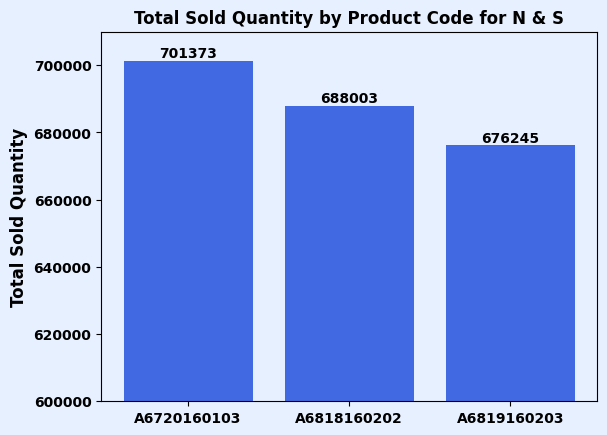

<Figure size 600x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

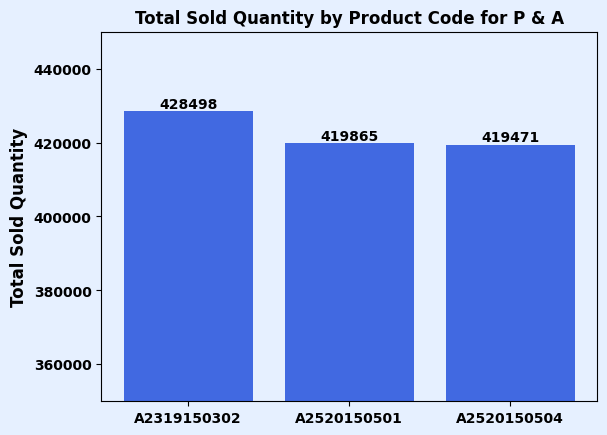

<Figure size 600x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

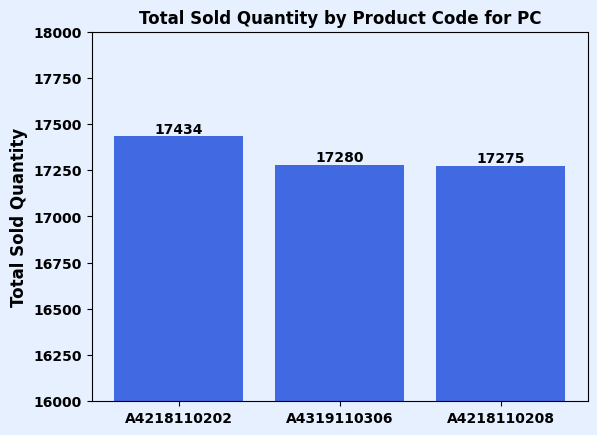

In [27]:
# Filter data for each division
divisions = ['N & S', 'P & A', 'PC']

# Determine y-axis limits for each division
y_limits = {
    'N & S': (600000, 710000),
    'P & A': (350000, 450000),
    'PC': (16000, 18000)
}

# Plot for each division
for division in divisions:
    plt.figure(figsize=(6, 6))
    plt.figure(facecolor='#001F3D')
    fig, ax = plt.subplots()

    # Filter the data for the current division
    df_filtered = df10[df10['division'] == division]

    # Create the bar chart
    bars = ax.bar(df_filtered['product_code'], df_filtered['total_sold_quantity'], color='#4169E1')
    ax.set_facecolor('#E6F0FF')
    fig.patch.set_facecolor('#E6F0FF')

    # Adding the text on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontweight='bold', color='black')

    # Adding labels and title
    ax.set_ylabel('Total Sold Quantity', fontweight='bold', fontsize=12)
    ax.set_title(f'Total Sold Quantity by Product Code for {division}', fontweight='bold', fontsize=12)
    ax.tick_params(axis='x', colors='black', labelsize=10)
    ax.tick_params(axis='y', colors='black', labelsize=10)

    # Set y-axis limits for better comparison
    ax.set_ylim(y_limits[division])

    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.show()